In [353]:
#Load libraries
import pandas as pd
import numpy as np
import os
os.getcwd()   
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import norm 

In [300]:
#Set working directory
os.chdir("C:/Users/Sridhar/Desktop/ed porject")

In [354]:
### Import Datasets
#Read files:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

The dataset consists of an ID_code, 200 input variables (all numeric) and a binary target variable representing the transaction-happened. Since the entire dataset is masked, cannot do much of exploratory data analysis

In [106]:
##print the value columns in Train and Test data
print('Train:', train.columns)
print('Test:', test.columns)

Train: Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)
Test: Index(['ID_code', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5',
       'var_6', 'var_7', 'var_8',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=201)


*Both training set and test set have 200000 rows.
*Training set have 202 features and test set have 201 features.
*One extra feature in the training set is target feature, which is the class of a row.
*target feature is binary (0 or 1), 1 = transaction and 0 = no transaction.
*ID_code feature is the unique id of the row and it doesn't have any effect on target.
*The other features are anonymized and labeled from var_0 to var_199

## Data exploration

In [9]:
train.head(2)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.093,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.389,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518


In [10]:
test.head(2)

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760


In [11]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [12]:
test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


In [107]:
print('Train:', train.info())
print('Test:', test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB
Train: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB
Test: None


In [108]:
# Checkig  the shape of the train and test sets
print('Train:', train.shape)
print('Test:', test.shape)

Train: (200000, 202)
Test: (200000, 201)


## missing value analysis

In [109]:
#missing value 
missing_train = train.isnull().sum()
#missing_train

In [110]:
missing_test = test.isnull().sum()
#missing_test

##There are no missing values in the dataset</pre>

In [111]:
#This is an unbalanced classification problem with only 10% records having target variable = 1. 
#Check the target variable destribution
train['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [355]:
cnames = list(train.columns[2:])

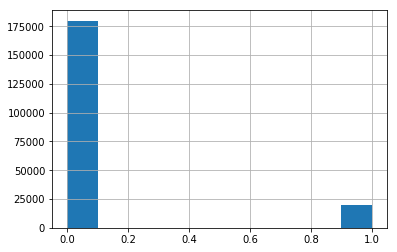

In [113]:
train['target'].hist()

In [356]:
#Detect and delete outliers from data
for i in cnames:
   
    q75, q25 = np.percentile(train.loc[:,i], [75 ,25])
    iqr = q75 - q25

    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
   
    
    train = train.drop(train[train.loc[:,i] < minimum].index)
    train = train.drop(train[train.loc[:,i] > maximum].index)

In [115]:
train.shape

(175073, 202)

## correlation analysis

In [357]:
df_corr = train.loc[:,cnames]

## Visulisation of corrleation

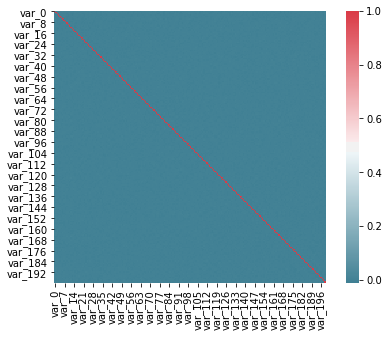

In [117]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [358]:
#for visualization of normalization
cnames1 = train.iloc[:,2:25]

In [12]:
df=  pd.DataFrame(cnames1)
df.to_csv( "normal.csv",index = False)
data = pd.read_csv("normal.csv")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028BA8023AC8>,
      dtype=object)

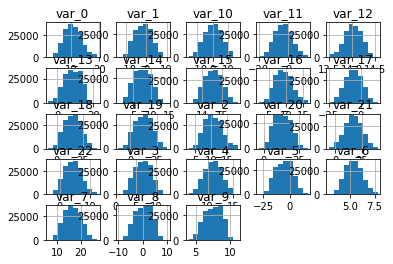

In [27]:
data.hist()

In [359]:
#Nomalisation
for j in cnames:
    #print(i)
    train[j] = (train[j] - min(train[j]))/(max(train[j]) - min(train[j]))

In [233]:
print('Train:', train.shape)
print('Test:', test.shape)

Train: (175073, 202)
Test: (200000, 201)


## Model Developments

## Decision Tree

In [320]:
#Import Libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [171]:
#replace target categories with Yes or No
train['target'] = train['target'].replace(0, 'No')
train['target'] = train['target'].replace(1, 'Yes')

In [339]:
# Target variable from the Training Set
Target = train['target']

# Input dataset for Train and Test 
train_inp = train.drop(columns = ['target', 'ID_code'])
test_inp = test.drop(columns = ['ID_code'])

# List of feature names
features = list(train_inp.columns)

In [340]:
#Divide data into train and test
#X = train.values[:, 2:]
#Y = train.iloc[:,1]

#X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)
X_train, X_test, y_train, y_test = train_test_split(train_inp, Target, 
                                                    test_size= 0.2)

In [197]:
#train['target']

In [323]:
# Create Decision Tree Classifier object with few parameters
tree_clf = DecisionTreeClassifier(class_weight='balanced', random_state = 2019, 
                                  max_features = 0.7, min_samples_leaf = 80)

# Fit the object on training data
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=0.7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=80, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=2019, splitter='best')

In [324]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc, confusion_matrix, classification_report


In [325]:
# Predict for validation set and check the performance
tree_preds = tree_clf.predict_proba(X_test)[:, 1]

In [326]:
print('ROC/AUC Score:',roc_auc_score(y_test, tree_preds))

ROC/AUC Score: 0.6610836741822196


In [328]:
confusion_matrix(y_test, tree_preds.round())

array([[20789, 10759],
       [ 1482,  1985]], dtype=int64)

In [ ]:
##Accuary = 0.65
## precision = 0.15
## recall =0.57
##Flase negative rate =0.42 
##auc = 0.66

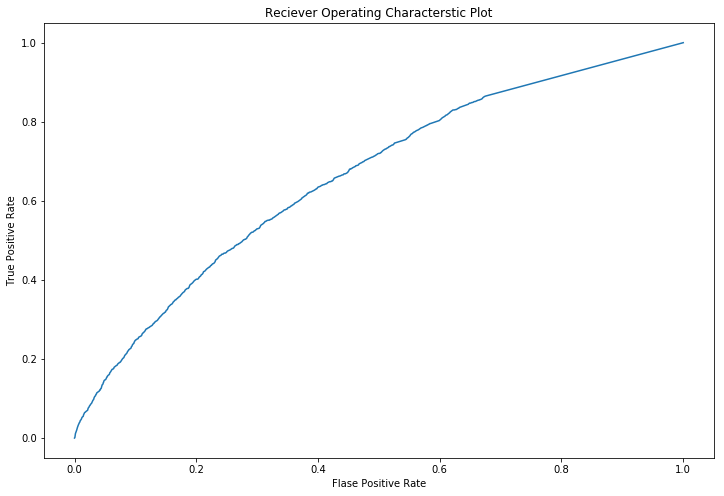

In [329]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
#plot no skill
#pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
fpr, tpr, thresholds = roc_curve(y_test, tree_preds, pos_label=1)
plt.figure(figsize = (12,8))
pyplot.plot(fpr, tpr)
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characterstic Plot')
auc(fpr,tpr)*100
# show the plot
pyplot.show()

## Logistic Regression

In [252]:
#replace target categories with 0 or 1
train['target'] = train['target'].replace('No',0)
train['target'] = train['target'].replace('Yes',1)

In [269]:
# Target variable from the Training Set
Target = train['target']

# Input dataset for Train and Test 
train_inp = train.drop(columns = ['target', 'ID_code'])
test_inp = test.drop(columns = ['ID_code'])

# List of feature names
features = list(train_inp.columns)

In [270]:
# Split the Train Dataset into training and validation sets for model building. 
# The training set now has 140K records and validation set has 60K records

X_train, X_test, y_train, y_test = train_test_split(train_inp, Target, 
                                                    test_size= 0.2, random_state = 2019)

In [271]:
# Create an object of Logistic Regression with parameters C and class_weight
logist = LogisticRegression(C=0.001, class_weight='balanced')

# Fit the training data on this object
logist.fit(X_train, y_train)


C:\Users\Sridhar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [272]:
# Predict the Target for validation dataset 
logist_pred = logist.predict_proba(X_test)[:,1]

In [273]:
def performance(y_test, logist_pred):
    logist_pred_var = [0 if i < 0.5 else 1 for i in logist_pred]
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, logist_pred_var)) 
      
    print(classification_report(y_test, logist_pred)) 
    
    fpr, tpr, thresholds = roc_curve(y_test, logist_pred, pos_label=1)
    print('AUC:')
    print(auc(fpr, tpr))
    

In [294]:
performance(y_test, logist_pred.round())

Confusion Matrix:
[[24829  6825]
 [  745  2616]]
              precision    recall  f1-score   support

           0       0.97      0.78      0.87     31654
           1       0.28      0.78      0.41      3361

    accuracy                           0.78     35015
   macro avg       0.62      0.78      0.64     35015
weighted avg       0.90      0.78      0.82     35015

AUC:
0.7813636095068165


In [ ]:
##Accuarcy=0.78
##precision=0.778
##recall=0.27
##false negative rate=0.22
#AUC=0.78

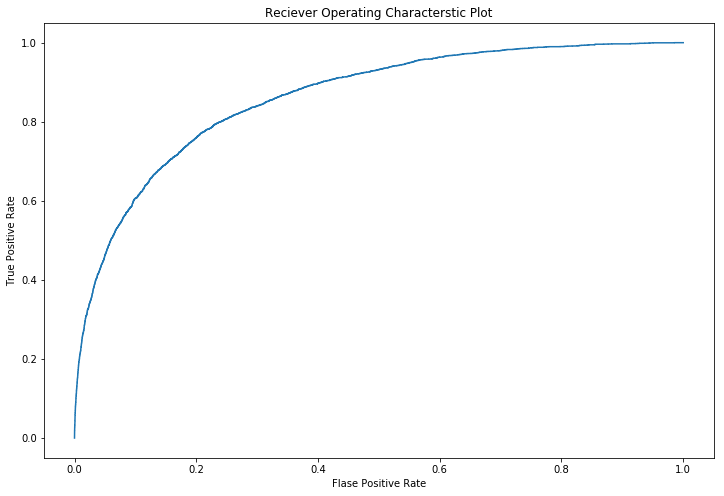

In [275]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
#plot no skill
#pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
fpr, tpr, thresholds = roc_curve(y_test, logist_pred, pos_label=1)
plt.figure(figsize = (12,8))
pyplot.plot(fpr, tpr)
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characterstic Plot')
auc(fpr,tpr)*100
# show the plot
pyplot.show()

## Navie Bayes

In [360]:
#replace target categories with Yes or No
train['target'] = train['target'].replace(0, 'No')
train['target'] = train['target'].replace(1, 'Yes')

In [361]:
#Divide data into train and test
X = train.values[:, 2:]
Y = train.iloc[:,1]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [362]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [364]:
#Naive Bayes implementation
NB_model = GaussianNB().fit(X_train, y_train)


In [365]:
#predict test cases
NB_Predictions = NB_model.predict(X_test)

In [366]:
#Build confusion matrix
CM = pd.crosstab(y_test, NB_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]


In [367]:
#False Negative rate 
(FN*100)/(FN+TP)

63.858291158082764

In [368]:
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

92.44323861202342

In [369]:
#precision
TP*100/(TP+FP)

70.78717201166181

In [370]:
#recall
TP*100/(TP+FN)

36.141708841917236

In [ ]:
probs = NB_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

In [ ]:
plt.title('AUC CURVE')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Random Forest 

In [ ]:
## For sample purpose

In [342]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

# Create random Forest Object using the mentioned parameters
random_forest = RandomForestClassifier(n_estimators=30, random_state=2019, verbose=1,
                                      class_weight='balanced', max_features = 0.5, 
                                       min_samples_leaf = 100)

# Fit the object on training set 
random_forest.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 19.8min finished


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features=0.5,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=100,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=30, n_jobs=None, oob_score=False,
                       random_state=2019, verbose=1, warm_start=False)

In [343]:
forest_preds = random_forest.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.4s finished


In [345]:
print(metrics.confusion_matrix(y_test, forest_preds.round()))

[[26736  4813]
 [ 1728  1738]]


In [347]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, forest_preds, pos_label=1)
metrics.auc(fpr, tpr)

0.7733539618721494

In [348]:
print('ROC/AUC Score:',roc_auc_score(y_test, forest_preds.round()))

ROC/AUC Score: 0.6744431220912698


In [350]:
accuracy_score(y_test, forest_preds.round())

0.813194345280594

In [ ]:
##Accuarcy=0.81
##precision=0.26
##recall=0.50
##false negative rate=0.49
#AUC=0.67

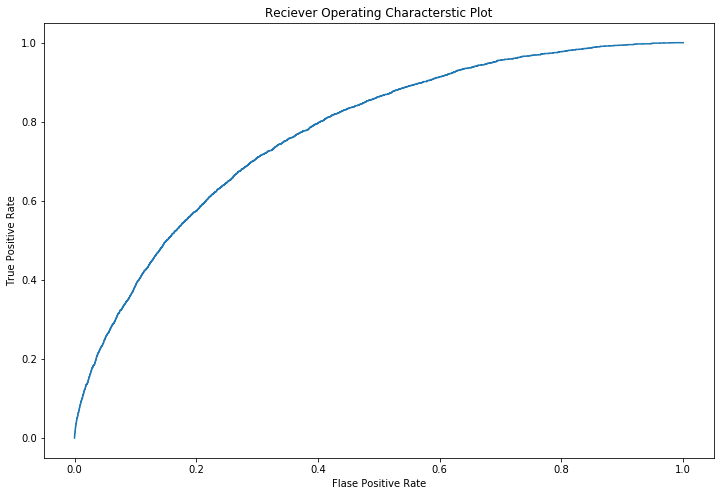

In [352]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
#plot no skill
#pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
fpr, tpr, thresholds = roc_curve(y_test, forest_preds, pos_label=1)
plt.figure(figsize = (12,8))
pyplot.plot(fpr, tpr)
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characterstic Plot')
auc(fpr,tpr)*100
# show the plot
pyplot.show()